<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Neural-Network/blob/main/02%20-%20Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

# 그레디언트 소실과 폭주
## 1.글로럿과 He 초기화

In [2]:
[initializer for initializer in dir(keras.initializers) if not initializer.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 2.수렴하지 않는 활성화 함수

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
z = np.linspace(-5, 5, 200)
z

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

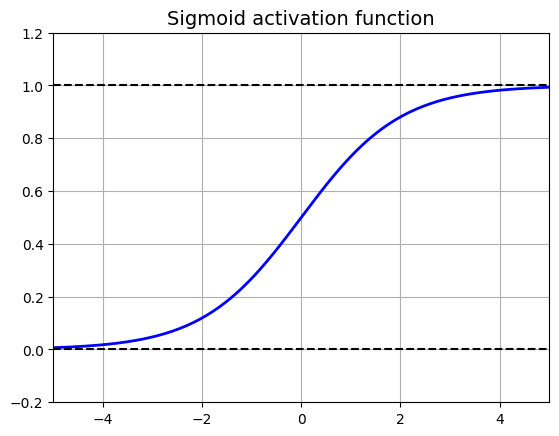

In [7]:
# 로지스틱 시그모이드 함수
def logit(z):
    return 1 / (1 + np.exp(-z))

plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(100, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 2.2343 - accuracy: 0.1647 - val_loss: 2.0819 - val_accuracy: 0.2594
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 1.9642 - accuracy: 0.3480 - val_loss: 1.8565 - val_accuracy: 0.4148
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 1.7686 - accuracy: 0.4585 - val_loss: 1.6817 - val_accuracy: 0.4918
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.6142 - accuracy: 0.5219 - val_loss: 1.5416 - val_accuracy: 0.5418
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4902 - accuracy: 0.5612 - val_loss: 1.4304 - val_accuracy: 0.5858
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.3894 - accuracy: 0.5907 - val_loss: 1.3379 - val_accuracy: 0.6104
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3065 - accuracy: 0.6127 - val_loss: 1.2623 - val_accur

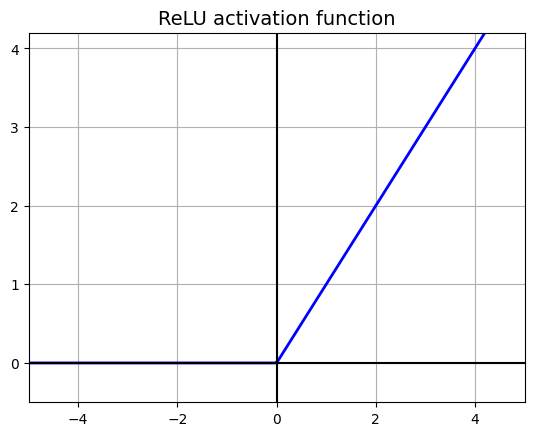

In [10]:
# ReLU
def relu(z):
    return np.maximum(0, z)

plt.plot(z, relu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 re_lu (ReLU)                (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.2962 - accuracy: 0.6076 - val_loss: 0.8870 - val_accuracy: 0.7108
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7998 - accuracy: 0.7378 - val_loss: 0.7139 - val_accuracy: 0.7644
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6854 - accuracy: 0.7729 - val_loss: 0.6454 - val_accuracy: 0.7862
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6255 - accuracy: 0.7921 - val_loss: 0.5919 - val_accuracy: 0.8082
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5866 - accuracy: 0.8045 - val_loss: 0.5591 - val_accuracy: 0.8184
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5582 - accuracy: 0.8123 - val_loss: 0.5358 - val_accuracy: 0.8234
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5364 - accuracy: 0.8190 - val_loss: 0.5153 - val_accuracy:

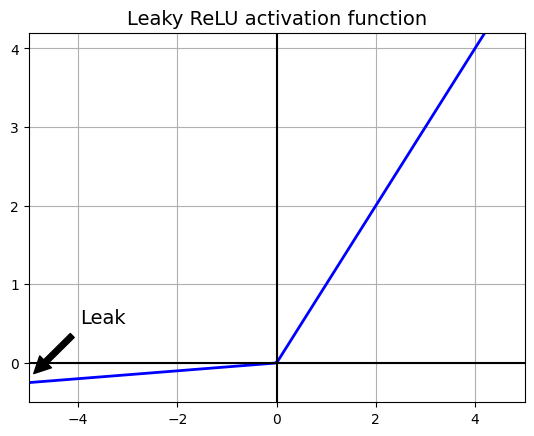

In [13]:
# Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [14]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3510 - accuracy: 0.5998 - val_loss: 0.9142 - val_accuracy: 0.7092
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8105 - accuracy: 0.7397 - val_loss: 0.7206 - val_accuracy: 0.7670
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6870 - accuracy: 0.7775 - val_loss: 0.6499 - val_accuracy: 0.7866
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6252 - accuracy: 0.7964 - val_loss: 0.5946 - val_accuracy: 0.8024
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5859 - accuracy: 0.8077 - val_loss: 0.5615 - val_accuracy: 0.8154
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5574 - accuracy: 0.8145 - val_loss: 0.5373 - val_accuracy: 0.8212
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5356 - accuracy: 0.8195 - val_loss: 0.5177 - val_accuracy:

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 p_re_lu (PReLU)             (None, 300)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 p_re_lu_1 (PReLU)           (None, 100)               100       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 267010 (1.02 MB)
Trainable params: 267010 

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4142 - accuracy: 0.5987 - val_loss: 0.9379 - val_accuracy: 0.7298
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8288 - accuracy: 0.7481 - val_loss: 0.7270 - val_accuracy: 0.7770
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6944 - accuracy: 0.7793 - val_loss: 0.6505 - val_accuracy: 0.7944
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6288 - accuracy: 0.7959 - val_loss: 0.5934 - val_accuracy: 0.8102
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5878 - accuracy: 0.8069 - val_loss: 0.5583 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5588 - accuracy: 0.8131 - val_loss: 0.5347 - val_accuracy: 0.8250
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5370 - accuracy: 0.8188 - val_loss: 0.5149 - val_accuracy:

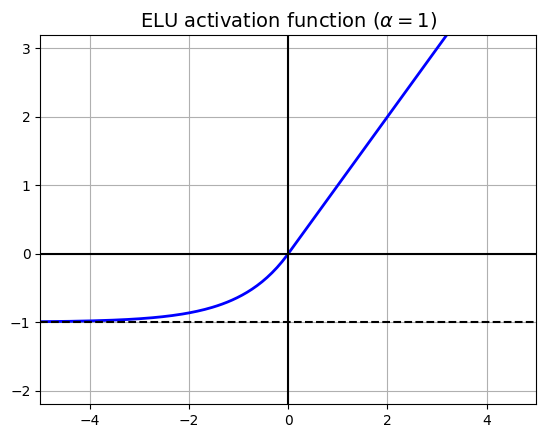

In [18]:
# ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1511 - accuracy: 0.6438 - val_loss: 0.7832 - val_accuracy: 0.7536
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7224 - accuracy: 0.7656 - val_loss: 0.6479 - val_accuracy: 0.7954
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6307 - accuracy: 0.7916 - val_loss: 0.5935 - val_accuracy: 0.8082
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5827 - accuracy: 0.8050 - val_loss: 0.5502 - val_accuracy: 0.8184
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5521 - accuracy: 0.8136 - val_loss: 0.5267 - val_accuracy: 0.8284
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5301 - accuracy: 0.8194 - val_loss: 0.5083 - val_accuracy: 0.8306
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5132 - accuracy: 0.8237 - val_loss: 0.4933 - val_accuracy:

In [21]:
# SELU
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

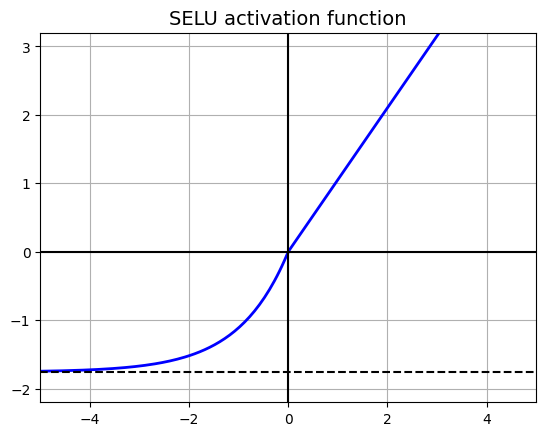

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [23]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds
X_test_scaled = (X_test - means) / stds

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(100):
  keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_101 (Dense)           (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7394 - accuracy: 0.7499 - val_loss: 0.5425 - val_accuracy: 0.8146
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5200 - accuracy: 0.8207 - val_loss: 0.4844 - val_accuracy: 0.8352
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4796 - accuracy: 0.8344 - val_loss: 0.4631 - val_accuracy: 0.8420
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4570 - accuracy: 0.8422 - val_loss: 0.4452 - val_accuracy: 0.8478
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4414 - accuracy: 0.8477 - val_loss: 0.4346 - val_accuracy: 0.8526
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4294 - accuracy: 0.8519 - val_loss: 0.4276 - val_accuracy: 0.8558
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4200 - accuracy: 0.8553 - val_loss: 0.4197 - val_accuracy:

In [26]:
[activation for activation in dir(keras.activations) if not activation.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [27]:
[layer for layer in dir(keras.layers) if "relu" in layer.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## 3.배치 정규화

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_102 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_103 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.8379 - accuracy: 0.7167 - val_loss: 0.5580 - val_accuracy: 0.8132
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5737 - accuracy: 0.7994 - val_loss: 0.4802 - val_accuracy: 0.8348
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5208 - accuracy: 0.8168 - val_loss: 0.4454 - val_accuracy: 0.8442
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4833 - accuracy: 0.8306 - val_loss: 0.4238 - val_accuracy: 0.8506
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4560 - accuracy: 0.8392 - val_loss: 0.4092 - val_accuracy: 0.8572
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4411 - accuracy: 0.8438 - val_loss: 0.3973 - val_accuracy: 0.8608
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4281 - accuracy: 0.8471 - val_loss: 0.3872 - val_ac

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_105 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_106 (Dense)           (None, 100)              

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0440 - accuracy: 0.6725 - val_loss: 0.6708 - val_accuracy: 0.7910
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6748 - accuracy: 0.7812 - val_loss: 0.5532 - val_accuracy: 0.8200
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5939 - accuracy: 0.8044 - val_loss: 0.4987 - val_accuracy: 0.8378
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5420 - accuracy: 0.8187 - val_loss: 0.4668 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5100 - accuracy: 0.8264 - val_loss: 0.4440 - val_accuracy: 0.8528
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4882 - accuracy: 0.8323 - val_loss: 0.4265 - val_accuracy: 0.8568
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4702 - accuracy: 0.8379 - val_loss: 0.4136 - val_ac

## 4.그레디언트 클리핑

In [32]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

In [33]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="mse", optimizer=optimizer)

# 전이학습
## 1.데이터 준비

In [34]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [35]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

## 2.작업 A를 수행하기 위한 모델 A 훈련

In [36]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 8)                 4

In [37]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5707 - accuracy: 0.8114 - val_loss: 0.3748 - val_accuracy: 0.8620
Epoch 2/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3467 - accuracy: 0.8789 - val_loss: 0.3169 - val_accuracy: 0.8864
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3122 - accuracy: 0.8909 - val_loss: 0.2917 - val_accuracy: 0.8946
Epoch 4/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2939 - accuracy: 0.8979 - val_loss: 0.2797 - val_accuracy: 0.8991
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2817 - accuracy: 0.9033 - val_loss: 0.2712 - val_accuracy: 0.9048
Epoch 6/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2726 - accuracy: 0.9062 - val_loss: 0.2692 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2652 - accuracy: 0.9091 - val_loss: 0.2627 - val_accuracy:

In [38]:
model_A.save("my_model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.작업 B를 수행하기 위한 모델 B 훈련

In [39]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))
model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 5

In [40]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 46ms/step - loss: 0.3640 - accuracy: 0.8650 - val_loss: 0.3397 - val_accuracy: 0.8854
Epoch 2/20
7/7 [==============================] - 0s 33ms/step - loss: 0.2907 - accuracy: 0.9250 - val_loss: 0.2845 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 0s 32ms/step - loss: 0.2408 - accuracy: 0.9250 - val_loss: 0.2460 - val_accuracy: 0.9361
Epoch 4/20
7/7 [==============================] - 0s 32ms/step - loss: 0.2059 - accuracy: 0.9400 - val_loss: 0.2187 - val_accuracy: 0.9462
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1796 - accuracy: 0.9600 - val_loss: 0.1986 - val_accuracy: 0.9564
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1599 - accuracy: 0.9700 - val_loss: 0.1831 - val_accuracy: 0.9594
Epoch 7/20
7/7 [==============================] - 0s 21ms/step - loss: 0.1450 - accuracy: 0.9750 - val_loss: 0.1718 - val_accuracy: 0.9594
Epoch 8/20
7/7 [===========

## 4.전이학습 구현

In [41]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [42]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 56ms/step - loss: 0.9280 - accuracy: 0.4900 - val_loss: 0.8940 - val_accuracy: 0.5081
Epoch 2/4
7/7 [==============================] - 0s 19ms/step - loss: 0.8550 - accuracy: 0.5300 - val_loss: 0.8302 - val_accuracy: 0.5345
Epoch 3/4
7/7 [==============================] - 0s 19ms/step - loss: 0.7915 - accuracy: 0.5500 - val_loss: 0.7736 - val_accuracy: 0.5568
Epoch 4/4
7/7 [==============================] - 0s 19ms/step - loss: 0.7352 - accuracy: 0.5750 - val_loss: 0.7183 - val_accuracy: 0.5842


In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 2s 80ms/step - loss: 0.5331 - accuracy: 0.7000 - val_loss: 0.3792 - val_accuracy: 0.8469
Epoch 2/16
7/7 [==============================] - 0s 35ms/step - loss: 0.3173 - accuracy: 0.9150 - val_loss: 0.2863 - val_accuracy: 0.9087
Epoch 3/16
7/7 [==============================] - 0s 36ms/step - loss: 0.2403 - accuracy: 0.9500 - val_loss: 0.2337 - val_accuracy: 0.9351
Epoch 4/16
7/7 [==============================] - 0s 36ms/step - loss: 0.1951 - accuracy: 0.9750 - val_loss: 0.1974 - val_accuracy: 0.9503
Epoch 5/16
7/7 [==============================] - 0s 27ms/step - loss: 0.1631 - accuracy: 0.9750 - val_loss: 0.1718 - val_accuracy: 0.9584
Epoch 6/16
7/7 [==============================] - 0s 35ms/step - loss: 0.1393 - accuracy: 0.9750 - val_loss: 0.1524 - val_accuracy: 0.9635
Epoch 7/16
7/7 [==============================] - 0s 28ms/step - loss: 0.1215 - accuracy: 0.9800 - val_loss: 0.1367 - val_accuracy: 0.9675
Epoch 8/16
7/7 [===========

In [45]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9855


[0.08754409849643707, 0.9854999780654907]

In [46]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9870


[0.08211410790681839, 0.9869999885559082]

In [47]:
(100 - 97.75) / (100 - 98.90)

2.045454545454556

# 고속 옵티마이저
## 1.모멘텀 최적화

In [48]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## 2.네스테로프 가속 경사

In [49]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## 3.AdaGrad

In [50]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## 4.RMSProp

In [51]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## 5.Adam

In [52]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 6.AdaMax

In [53]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 7.Nadam

In [54]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# 학습률 스케줄링
## 1.지수 기반 스케줄링

In [55]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [56]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7274 - accuracy: 0.7849 - val_loss: 0.6689 - val_accuracy: 0.8130 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6846 - accuracy: 0.7957 - val_loss: 0.9084 - val_accuracy: 0.7128 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7133 - accuracy: 0.7997 - val_loss: 0.8052 - val_accuracy: 0.8152 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6151 - accuracy: 0.8261 - val_loss: 0.5764 - val_accuracy: 0.8276 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5527 - accuracy: 0.8411 - val_loss: 0.5908 - val_accuracy: 0.8532 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5010 - accuracy: 0.8544 - val_loss: 0.5820 - val_accuracy: 0.8560 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 8s

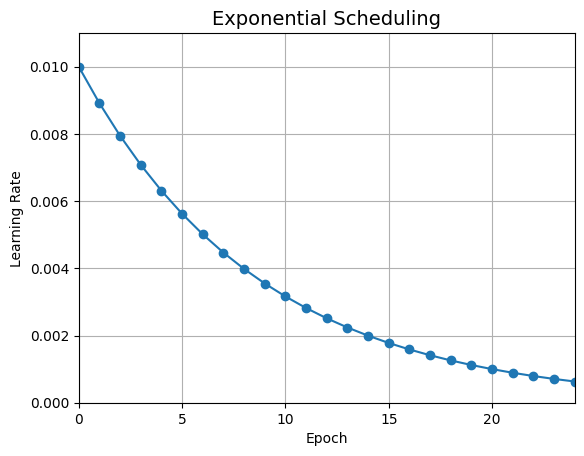

In [58]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 2.구간별 고정 스케줄링

In [59]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [60]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [61]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7424 - accuracy: 0.7782 - val_loss: 0.6905 - val_accuracy: 0.8110 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7741 - accuracy: 0.7695 - val_loss: 0.7125 - val_accuracy: 0.7714 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9987 - accuracy: 0.6804 - val_loss: 1.0377 - val_accuracy: 0.6548 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0716 - accuracy: 0.6553 - val_loss: 1.1248 - val_accuracy: 0.5818 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 1.1247 - accuracy: 0.5962 - val_loss: 1.0093 - val_accuracy: 0.5750 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9106 - accuracy: 0.6436 - val_loss: 0.8656 - val_accuracy: 0.6698 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8

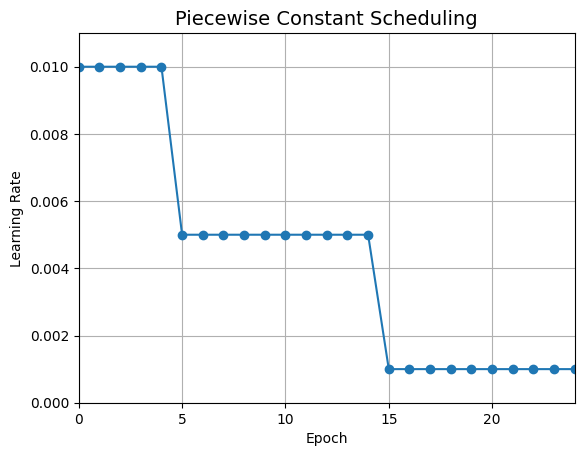

In [62]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 3.성능 기반 스케줄링

In [63]:
tf.random.set_seed(42)
np.random.seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5933 - accuracy: 0.8075 - val_loss: 0.5115 - val_accuracy: 0.8426 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4954 - accuracy: 0.8395 - val_loss: 0.6205 - val_accuracy: 0.8338 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5063 - accuracy: 0.8431 - val_loss: 0.4487 - val_accuracy: 0.8540 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5241 - accuracy: 0.8437 - val_loss: 0.5031 - val_accuracy: 0.8530 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5164 - accuracy: 0.8498 - val_loss: 0.5474 - val_accuracy: 0.8292 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5146 - accuracy: 0.8530 - val_loss: 0.5714 - val_accuracy: 0.8536 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

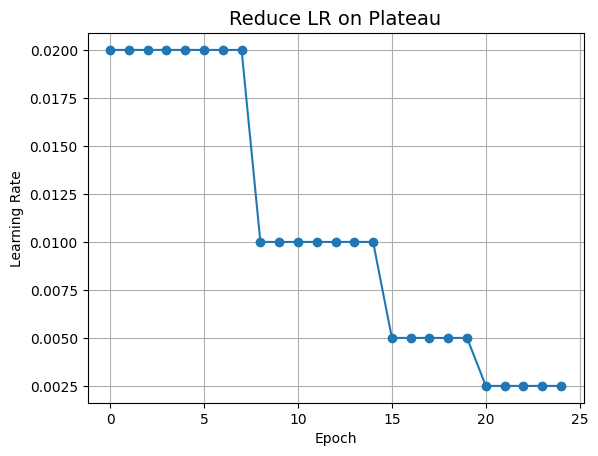

In [65]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Reduce LR on Plateau", fontsize=14)
plt.grid(True)
plt.show()

# 규제를 사용해 과대적합 피하기
## 1.$\ell_1$과 $\ell_2$ 규제

In [66]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.5724 - accuracy: 0.8126 - val_loss: 0.7049 - val_accuracy: 0.8386
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7186 - accuracy: 0.8281 - val_loss: 0.6935 - val_accuracy: 0.8360


In [68]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6222 - accuracy: 0.8132 - val_loss: 0.7119 - val_accuracy: 0.8358
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7239 - accuracy: 0.8263 - val_loss: 0.6942 - val_accuracy: 0.8316


## 2.드롭아웃

In [70]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 5ms/step - loss: 0.5678 - accuracy: 0.8059 - val_loss: 0.3628 - val_accuracy: 0.8694
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4232 - accuracy: 0.8454 - val_loss: 0.3448 - val_accuracy: 0.8694


## 3.알파 드롭아웃

In [71]:
tf.random.set_seed(42)
np.random.seed(42)

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6619 - accuracy: 0.7606 - val_loss: 0.5736 - val_accuracy: 0.8452
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5563 - accuracy: 0.7951 - val_loss: 0.5696 - val_accuracy: 0.8436
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5220 - accuracy: 0.8069 - val_loss: 0.5127 - val_accuracy: 0.8534
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5054 - accuracy: 0.8126 - val_loss: 0.4616 - val_accuracy: 0.8654
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4924 - accuracy: 0.8182 - val_loss: 0.4466 - val_accuracy: 0.8664
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4817 - accuracy: 0.8221 - val_loss: 0.4730 - val_accuracy: 0.8600
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4695 - accuracy: 0.8249 - val_loss: 0.4576 - val_accuracy:

## 4.MC 드롭아웃

In [73]:
tf.random.set_seed(42)
np.random.seed(42)

In [74]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [75]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [76]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.08, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.02, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.45, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.6 , 0.  , 0.28]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.47, 0.  , 0.38]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.23, 0.  , 0.45]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.39, 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.4 , 0.  , 0

In [77]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.25, 0.  , 0.66]],
      dtype=float32)

In [78]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.24, 0.  , 0.26]],
      dtype=float32)

In [79]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [80]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8583

In [81]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [82]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])
mc_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaD  (None, 784)               0         
 ropout)                                                         
                                                                 
 dense_27 (Dense)            (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlph  (None, 300)               0         
 aDropout)                                                       
                                                                 
 dense_28 (Dense)            (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlph  (None, 100)             

In [83]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [84]:
mc_model.set_weights(model.get_weights())

In [85]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 16ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.27, 0.  , 0.66]],
      dtype=float32)

## 5.맥스 노름

In [86]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [87]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

In [88]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 5ms/step - loss: 0.4709 - accuracy: 0.8354 - val_loss: 0.3663 - val_accuracy: 0.8664
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3566 - accuracy: 0.8705 - val_loss: 0.3973 - val_accuracy: 0.8588
